
*   Bài toán network optimization:  [NO](https://colab.research.google.com/drive/1hcnvJtrd36kmnBtDq-a4-iF3gHHaX4tW#scrollTo=9B4dEXlRbWIl)
*   Bài toán DRP tuần: [DRP](https://colab.research.google.com/drive/1sk8wZcjrHXGoi8w55veppxNSv3aN-vOR?usp=sharing)
* Bài toán DRP ngày: [link text](https://colab.research.google.com/drive/1E77l_nyUr6pfdiLdOzwawBDBEf2TBDYu?usp=sharing)
* Bài toán demand forecasting
    1. Xác định phân phối, kỳ vọng, phương sai trong quá khứ [link text](https://colab.research.google.com/drive/11yeZg5yHzoZHbmDH81PZ0MDWhyAtQDUV)
    2. Mô phỏng lại data từ kết quả trả ra ở (1) [link text](https://colab.research.google.com/drive/11yeZg5yHzoZHbmDH81PZ0MDWhyAtQDUV?usp=sharing)
    3. Dự đoán demand trong tương lai. [link text](https://colab.research.google.com/drive/1xZNXmgx1TqfvZZ5oYK7u23P5Z-uDuYgO?usp=sharing)



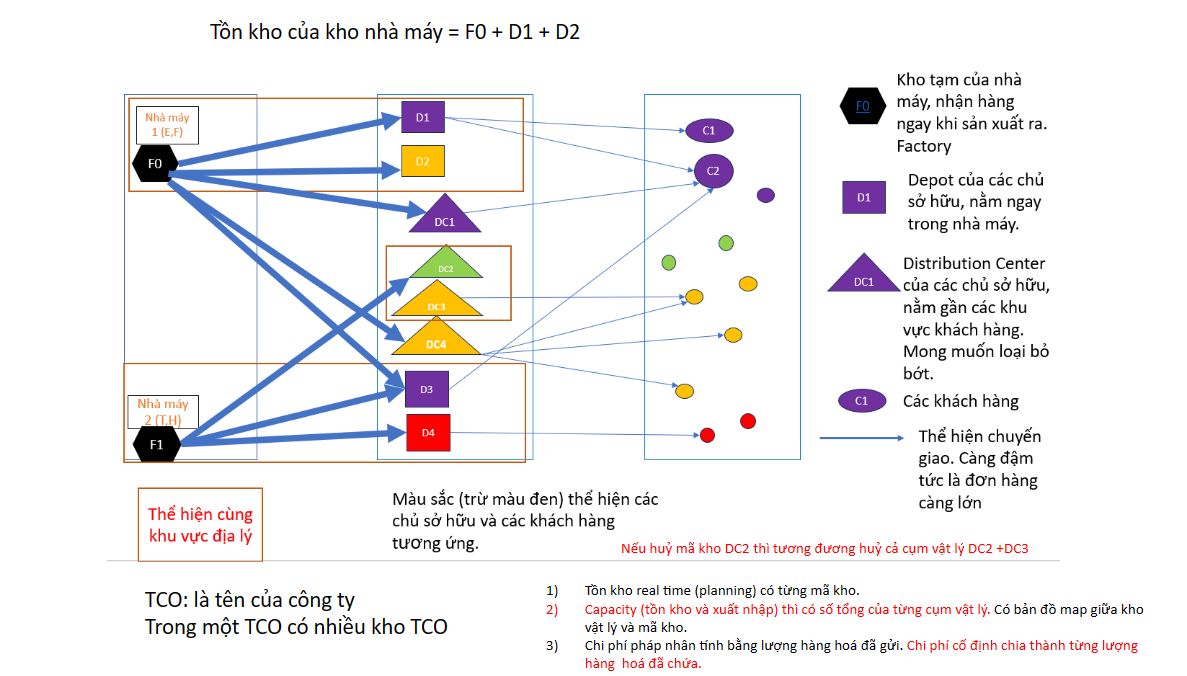

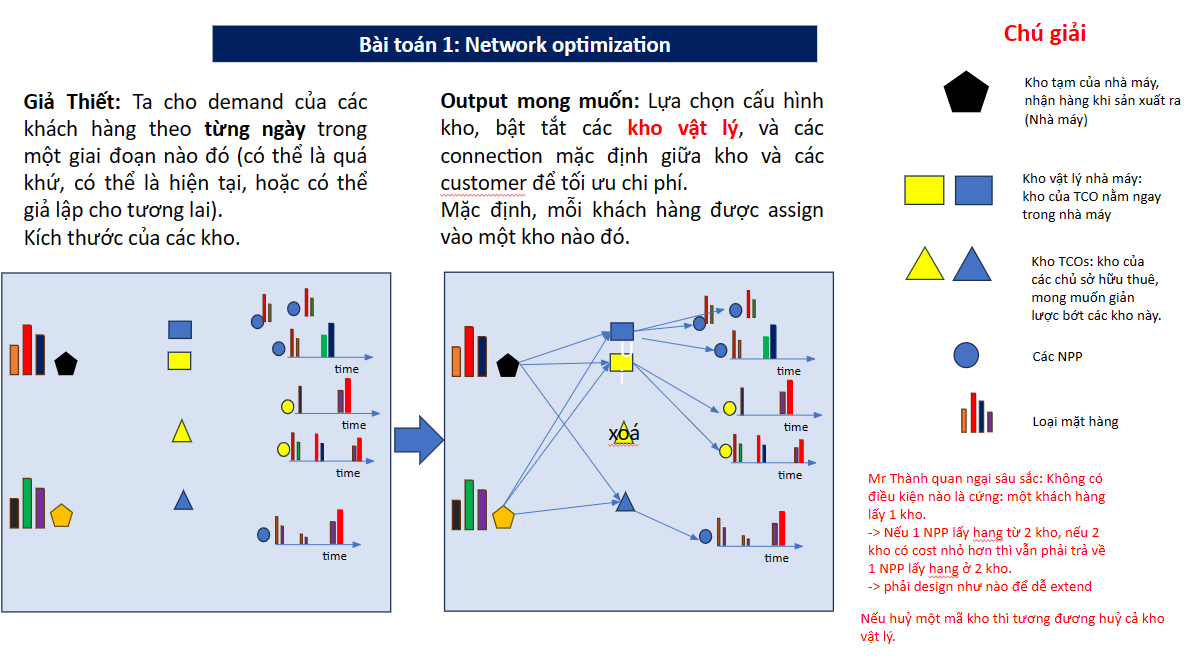

In [ ]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.1 which is incompatible.


In [ ]:
from ortools.linear_solver import pywraplp
import numpy as np
import math
import copy
import collections
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt
import time
import json
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive")
import random

Mounted at /content/drive


In [ ]:
import json
import codecs

# Model

# Mục mới

Input:

***parameter:***
- loại sản phẩm: n
- số lượng nhà máy: p
- số lượng kho vật lý: k
- số lượng khách hàng: m
- s_pn: số lượng hàng n trong nhà máy p.
- d_mn: số lượng hàng n mà khách m cần.
- C_k: khả năng lưu trữ kho vật lý k.
- ava_nk: lượng hàng n tồn kho ở kho vật lý k.
- safety_k: tồn kho theo NSX ở kho vật lý k.
- handlingCost_k: chi phí xuất nhập hàng ở kho vật lý k.
- **max_distance: khoảng cách lớn nhất được đi**
- D: distance matrix
- im_k: khả năng xuất nhập hàng ở kho vật lý k.
- matrixConfig: ma trận thể hiện mối quan hệ giữa các kho và NPP


***variable:***
1.  x_{pkn}:(biến nguyên)số lượng hàng n được vận chuyển từ nhà máy p đến kho k.
2. y_{kmn}:(biến nguyên) số lượng hàng n được vận chuyển từ kho k đến khách hàng m.
3. a_{pk}: (biến nhị phân) có tuyến đi từ nhà máy p đến kho k.
4. b_{km} (biến nhị phân) có tuyến đi từ kho k đến khách hàng m.

❌❌❌:***chưa sửa***

***constraints:***
1. Tổng lượng hàng vận chuyển từ nhà máy bằng tổng lượng nhà máy cung cấp:
$$ \sum_k x_{pkn}  \le s_{pn}  $$ với mọi p,n

2. giới hạn khả năng xuất nhập hàng của từng kho
$$ \sum_n \sum_p x_{pkn} \le im_{k}  $$ với mọi k

3. Tổng lượng hàng nhập đến + hàng tồn kho không vượt quá capacity
$$ \sum_n (ava_{nk} + \sum_p x_{pkn} ) \le  C_k $$

4. tổng lượng hàng nhận được từ kho bằng lượng demand.
$$ \sum_k y_{kmn} \ge d_{mn}   $$

5. khoảng tồn kho an toàn cho từng sản phẩm.
$$ (safety_k + cycleInventory_k) * ( \sum_m y_{kmn})    \le ava_{nk} + \sum_p x_{pkn}  - \sum_m y_{kmn}   $$, với mọi k,n

6. Giới hạn khoảng cách đi
$$ a_{pk} * d_{pk} \le max_{distance} $$
$$ b_{km} * d_{km} \le max_{distance} $$

7. Mối quan hệ giữa các biến

$$ M*(1-a_{pk}) \le \sum_n x_{pkn}  , với mọi p,k $$
$$ M*(1-b_{km}) \le \sum_n y_{kmn}  , với mọi p,k $$
***cost***
$$ \min (\sum_n x_{pkn})*d_{pk}*c_{pk} + (\sum_n y_{kmn})*c_{km}*d_{km} + handlingCost_k (\sum_k x_{pkn} + \sum_k y_{kmn} ) $$

# Fake data

fake data

In [ ]:
num_products = 4 # @param {type:"slider", min:1, max:100, step:1}

In [ ]:
num_factories = 4 # @param {type:"slider", min:1, max:100, step:1}


In [ ]:
num_depots = 15 # @param {type:"slider", min:1, max:1000, step:1}


In [ ]:
num_customers = 40 # @param {type:"slider", min:1, max:1000, step:1}


In [ ]:
num_physic_depots = 6 # @param {type:"slider", min:0, max:100, step:1}

# Get input

## product

In [ ]:
def get_dict_product(productCode):
    dict_index_product = {}
    for index in range(len(productCode)):
        dict_index_product[index] = productCode[index]
    return dict_index_product

## factory

In [ ]:
def convert_factory_dictionary(factories):
    factory_dict = {}

    dict_index_factory = {}

    dict_factory_index = {}

    for fac_index in range(len(factories)):
        fac = factories[fac_index]
        factory_dict[fac['factoryCode']] = copy.copy(fac)
        dict_index_factory[fac_index] = fac['factoryCode']
        dict_factory_index[fac['factoryCode']] = fac_index

    return factory_dict, dict_index_factory, dict_factory_index


## customers


In [ ]:
import copy

def convert_customer_dictionary(customers):
    customer_dict = {}
    dict_index_customer = {}
    dict_customer_index = {}

    for cus_index in range(len(customers)):
        cus = customers[cus_index]
        customer_dict[cus['customerCode']] = copy.copy(cus)
        dict_index_customer[cus_index] = cus['customerCode']
        dict_customer_index[ cus['customerCode']] = cus_index

    # print(customer_dict)


    return customer_dict, dict_index_customer


## depots

In [ ]:
# capacity of depots
# C = []
# for index_depot in range(len(depots)):
#     C.append( depots[index_depot]['storageCapacity'])

# # lượng hàng tồn kho
# ava = np.zeros((num_depots,num_products), np.int_) # k (hàng) kho, n mặt hàng (cột)
# for index_depot in range(len(depots)):
#     inventory_safe = depots[index_depot]['inventory']
#     for each_product in  inventory_safe:
#         for code_ix in range(len(productCode)):
#             if each_product['productCode'] == productCode[code_ix]:
#                 ava[index_depot, code_ix] = each_product['Capacity']

# ava

In [ ]:
# tồn kho theo NSX
# safety = []
# for index_depot in range(len(depots)):
#     safety.append( depots[index_depot]['safeInventory'])

# # sai số ngày tồn kho chu kỳ
# cycleInventory = []
# for index_depot in range(len(depots)):
#     cycleInventory.append( depots[index_depot]['cycleInventory'])

# # chi phí xuất nhập hàng mỗi kho
# handlingCost = []
# for index_depot in range(len(depots)):
#     handlingCost.append( depots[index_depot]['handlingCost'])



In [ ]:
def convert_depot_dictionary(depots):

    depot_dict = {}
    dict_index_depot = {}

    for depot_index in range(len(depots)):

        dep = depots[depot_index]
        depot_dict[dep['depotCode']] = copy.copy(dep)
        dict_index_depot[depot_index] = dep['depotCode']

    return depot_dict, dict_index_depot



## Distance

# Data model

In [ ]:
def get_fake_data(num_products, num_factories, num_depots,num_customers, num_physic_depots):

    fake_data = {}

    # create data
    # supply
    fake_data['num_products'] = num_products
    fake_data['num_factories'] = num_factories
    fake_data['num_depots'] = num_depots
    fake_data['num_customers'] = num_customers
    fake_data['num_physic_depots'] = num_physic_depots

    fake_data['matrix_supply'] = np.random.randint(30,100,size= (num_factories,num_products))
    # fake_data['matrix_supply'] = [[100]]
    sum_S = np.sum(fake_data['matrix_supply'], axis=0)

    # demand
    demand_each_cus = sum_S // num_customers
    matrix_demand = np.empty((num_customers,num_products), int)
    for i in range(num_customers-1):
        matrix_demand[i] = np.copy(demand_each_cus)
    matrix_demand[-1] = sum_S - demand_each_cus*(num_customers-1)
    fake_data['matrix_demand'] = np.copy(matrix_demand)

    # fake_data['matrix_demand'] = [[40],[40]]

    # capacity each physic depot
    fake_data['capacity_physic_depots'] = [int(np.ceil(sum(sum_S)/(num_physic_depots-1)))]*num_physic_depots
    # fake_data['capacity_physic_depots'] = [100,100]

    # khả năng nhập của kho vật lý
    fake_data['limit_in'] = np.random.randint(70,130, num_physic_depots)
    # fake_data['limit_in'] = [80,80]
    # khả năng xuất của kho vật lý
    fake_data['limit_out'] = np.random.randint(70,130, num_physic_depots)


    # tồn kho theo NSX
    fake_data['safety_stock'] = np.random.randint(7,13, num_physic_depots)


    # hàng có sẵn trong kho.
    fake_data["inventory"] = np.random.randint(70,130, num_physic_depots)

    # chi phí xử lý nhập hàng mỗi pallet của mỗi kho vật lý
    fake_data['handlingCost_in'] = np.random.randint(10,30, num_physic_depots)
    # fake_data['handlingCost_in'] = [1,1]

    # chi phí xử lý nhập hàng mỗi pallet của mỗi kho vật lý
    fake_data['handlingCost_out'] = np.random.randint(10,30, num_physic_depots)
    # fake_data['handlingCost_out'] = [1,1]

    # location all points
    number_location = num_factories + num_depots + num_customers
    loc =  np.random.randint(1,100, (number_location,2))
    loc_f = loc[:num_factories]
    loc_h = loc[num_factories :num_factories + num_depots]
    loc_c = loc[num_factories + num_depots:]
    fake_data['loc_f'] = copy.copy(loc_f)
    fake_data['loc_h'] = copy.copy(loc_h)
    fake_data['loc_c'] = copy.copy(loc_c)
    # matrix distance factory - depot
    distane_f_h = np.empty((num_factories,num_depots), np.int_)
    for i in range(num_factories):
        for j in range(num_depots):
            distane_f_h[i,j] = round(((loc_f[i][0] - loc_h[j][0] )**2 + (loc_f[i][1] - loc_h[j][1] )**2 )**0.5)
    fake_data['distane_f_h'] = np.copy(distane_f_h)

    # matrix distance depot - customer
    distane_h_c = np.empty((num_depots,num_customers),  np.int_)
    for i in range(num_depots):
        for j in range(num_customers):
            distane_h_c[i,j] = round(((loc_c[j][0] - loc_h[i][0] )**2 + (loc_c[j][1] - loc_h[i][1] )**2 )**0.5)
    fake_data['distane_h_c'] = np.copy(distane_h_c)

    # max distance
    max_distance = round(np.mean(distane_h_c))
    fake_data['max_distance'] = 1000

    # matrix config
    mat_config_FD = np.ones((num_factories, num_depots), np.int_)
    mat_config_DC = np.empty((num_depots, num_customers), np.int_)
    for i in range(num_depots):
        for j in range(num_customers):
            mat_config_DC[i][j] = random.choice([0, 1, 2])
            mat_config_DC[i][j] = 1
    fake_data['mat_config_FD'] = np.copy(mat_config_FD)
    fake_data['mat_config_DC'] = np.copy(mat_config_DC)
    # fake_data['mat_config_DC'] = [[1,0],[0,1]]

    # map physic depots with depots
    map_physic_depots_with_depots  = np.zeros((num_physic_depots, num_depots), np.int_)

    # Đặt giá trị ngẫu nhiên thành 1 trong mỗi cột sao cho tổng mỗi cột bằng 1
    for physic_dep in range(num_depots):
        # Tạo một chỉ mục ngẫu nhiên trong mỗi cột
        idx = np.random.choice(num_physic_depots)
        # Đặt giá trị tại chỉ mục đó thành 1
        map_physic_depots_with_depots[idx, physic_dep] = 1

    fake_data['map_physic_depots_with_depots'] = np.copy(map_physic_depots_with_depots)
    # fake_data['map_physic_depots_with_depots'] = [[1,0],[0,1]]

    fake_data['cluster_physic_depot'] = []

    for cluster_idx in range(len(fake_data['map_physic_depots_with_depots'] )):
        depot_in_cluster = []
        for dep_idx in range(num_depots):
            if fake_data['map_physic_depots_with_depots'][cluster_idx][dep_idx] == 1:
                depot_in_cluster.append(dep_idx)
        fake_data['cluster_physic_depot'].append(depot_in_cluster)

    # fake_data['cluster_physic_depot'] = [[0],[1]]

    return fake_data


In [ ]:
data = get_fake_data(num_products, num_factories, num_depots, num_customers, num_physic_depots)
data

{'num_products': 4,
 'num_factories': 4,
 'num_depots': 15,
 'num_customers': 40,
 'num_physic_depots': 6,
 'matrix_supply': array([[73, 34, 57, 65],
        [83, 44, 95, 97],
        [41, 35, 54, 68],
        [52, 83, 57, 89]]),
 'matrix_demand': array([[ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],

In [ ]:
def get_json_data():

    get_json_data = {}

    data = json.load(codecs.open('sample_input_sabeco.json', 'r', 'utf-8-sig'))
    customers = data['customers']
    factories = data['factories']

    # số loại sản phẩm
    # products = []
    productCode = []
    for fac in factories:
        product_each_cus = fac['products']
        for each in product_each_cus:
            productCode.append(each['productCode'])
    productCode = set(productCode)
    productCode = list(productCode)
    num_products = len(productCode)

    dict_index_product = get_dict_product(productCode)

    matrix_supply = np.zeros((len(factories), len(productCode)), np.int_)
    for index_fac in range(len(factories)):

        fac = factories[index_fac]
        product_fac  =  fac['products']
        # weight_product = np.zeros((1, len(productCode)), np.int_)

        for each_product in  product_fac:
            for code_ix in range(len(productCode)):
                if each_product['productCode'] == productCode[code_ix]:
                    matrix_supply[index_fac,code_ix] = each_product['Capacity']


    factory_dict, dict_index_factory,dict_factory_index = convert_factory_dictionary(factories)

    num_customers = len(customers)
    customer_dict, dict_index_customer = convert_customer_dictionary(customers)

    matrix_demand = np.zeros((len(customers), len(productCode)), np.int_)
    for index_cus in range(len(customers)):

        cus = customers[index_cus]
        product_cus  =  cus['products']

        for each_product in  product_cus:
            for code_ix in range(len(productCode)):
                if each_product['productCode'] == productCode[code_ix]:
                    matrix_demand[index_cus,code_ix] = each_product['meanCapacity']

    # depots
    depots = data['depots']

    # capacity of depots
    C = []
    for index_depot in range(len(depots)):
        C.append( depots[index_depot]['storageCapacity'])

    # lượng hàng tồn kho
    ava = np.zeros((len(depots),len(productCode)), np.int_) # k (hàng) kho, n mặt hàng (cột)
    for index_depot in range(len(depots)):
        inventory_safe = depots[index_depot]['inventory']
        for each_product in  inventory_safe:
            for code_ix in range(len(productCode)):
                if each_product['productCode'] == productCode[code_ix]:
                    ava[index_depot, code_ix] = each_product['Capacity']

    # tồn kho theo NSX
    safety = []
    for index_depot in range(len(depots)):
        safety.append( depots[index_depot]['safeInventory'])

    # sai số ngày tồn kho chu kỳ
    cycleInventory = []
    for index_depot in range(len(depots)):
        cycleInventory.append( depots[index_depot]['cycleInventory'])

    # chi phí xuất nhập hàng mỗi kho
    handlingCost = []
    for index_depot in range(len(depots)):
        handlingCost.append( depots[index_depot]['handlingCost'])

    depot_dict, dict_index_depot = convert_depot_dictionary(depots)
    max_distance = data['maxDistance']

    distane_f_h = np.empty((num_factories, num_depots), np.int_)
    FD = data['distances']['FD']
    for i in range(len(factories)):
        for j in range(len(depots)):
            for loc_pair in FD:
                if loc_pair['factoryCode'] == dict_index_factory[i] and loc_pair['depotCode'] == dict_index_depot[j]:
                    distane_f_h[i,j] = loc_pair['distances']

    distane_h_c = np.empty((len(depots),len(customers)), np.int_)
    DC = data['distances']['DC']
    for i in range(len(depots)):
        for j in range(len(customers)):
            for loc_pair in DC:

                if loc_pair['depotCode'] == dict_index_depot[i] and loc_pair['customerCode'] == dict_index_customer[j]:
                    print(i,j,loc_pair['depotCode'],loc_pair['customerCode'] ,loc_pair['distances'])
                    distane_h_c[i,j] = loc_pair['distances']\



    return get_json_data

# SCIP model

In [ ]:
# Create the mip solver with the SCIP backend.
time1 = time.time()
solver = pywraplp.Solver.CreateSolver('SCIP')

# Create the variables

1. x_{fdn}:(biến nguyên)số lượng hàng n được vận chuyển từ nhà máy p đến kho d.
2. y_{dcn}:(biến nguyên) số lượng hàng n được vận chuyển từ kho d đến khách hàng c.
3. a_{fd}: (biến nhị phân) có tuyến đi từ nhà máy f đến kho d.
4. b_{dc}: (biến nhị phân) có tuyến đi từ kho d đến khách hàng c.

In [ ]:
infinity = solver.infinity()
x = {}
for fac_idx in range(data['num_factories']): # nhà máy
    for dep_idx in range(data['num_depots']): # kho
        for product_idx in range(data['num_products']): # sản phẩm
            x[fac_idx,dep_idx,product_idx] = solver.NumVar(0, infinity, '')

y = {}
for depot_idx in range(data['num_depots']): #kho
    for cus_idx in range(data['num_customers']): # khách hàng
        for product_idx in range(data['num_products']): #mặt hàng
            y[depot_idx,cus_idx, product_idx] = solver.NumVar(0, infinity, '')

a = {}
for fac_idx in range(data['num_factories']): # nhà máy
    for dep_idx in range(data['num_depots']): # kho
        a[fac_idx,dep_idx] = solver.IntVar(0, 1, '')


b = {}
for dep_idx in range(data['num_depots']): # kho
    for cus_idx in range(data['num_customers']): # khách hàng
        b[dep_idx,cus_idx] = solver.IntVar(0, 1, '')


In [ ]:
x

{(0, 0, 0): auto_v_000000000,
 (0, 0, 1): auto_v_000000001,
 (0, 0, 2): auto_v_000000002,
 (0, 0, 3): auto_v_000000003,
 (0, 1, 0): auto_v_000000004,
 (0, 1, 1): auto_v_000000005,
 (0, 1, 2): auto_v_000000006,
 (0, 1, 3): auto_v_000000007,
 (0, 2, 0): auto_v_000000008,
 (0, 2, 1): auto_v_000000009,
 (0, 2, 2): auto_v_000000010,
 (0, 2, 3): auto_v_000000011,
 (0, 3, 0): auto_v_000000012,
 (0, 3, 1): auto_v_000000013,
 (0, 3, 2): auto_v_000000014,
 (0, 3, 3): auto_v_000000015,
 (0, 4, 0): auto_v_000000016,
 (0, 4, 1): auto_v_000000017,
 (0, 4, 2): auto_v_000000018,
 (0, 4, 3): auto_v_000000019,
 (0, 5, 0): auto_v_000000020,
 (0, 5, 1): auto_v_000000021,
 (0, 5, 2): auto_v_000000022,
 (0, 5, 3): auto_v_000000023,
 (0, 6, 0): auto_v_000000024,
 (0, 6, 1): auto_v_000000025,
 (0, 6, 2): auto_v_000000026,
 (0, 6, 3): auto_v_000000027,
 (0, 7, 0): auto_v_000000028,
 (0, 7, 1): auto_v_000000029,
 (0, 7, 2): auto_v_000000030,
 (0, 7, 3): auto_v_000000031,
 (0, 8, 0): auto_v_000000032,
 (0, 8, 1)

# Create constraints

0. Mối quan hệ giữa nhà máy - kho - NPP

In [ ]:
# Nhà máy - kho TCO
for fac_idx in range(data['num_factories']):
    for depot_idx in range(data['num_depots']):
        if data['mat_config_FD'][fac_idx][depot_idx] == 0:
            solver.Add(a[fac_idx,depot_idx] == 0)
        if data['mat_config_FD'][fac_idx][depot_idx] == 2:
            solver.Add(a[fac_idx,depot_idx] == 1)

# Kho - NPP
for dep_idx in range(data['num_depots']):
    for cus_idx in range(data['num_customers']):
        if data['mat_config_DC'][dep_idx][cus_idx] == 0:
            solver.Add(b[dep_idx,cus_idx] == 0)
        if data['mat_config_DC'][dep_idx][cus_idx] == 2:
            solver.Add(b[dep_idx,cus_idx] == 1)

In [ ]:
b[0,1]

auto_v_000002701

1. Tổng lượng hàng vận chuyển từ nhà máy bằng tổng lượng nhà máy cung cấp:
$$ \sum_k x_{pkn} <= s_{pn}  $$ với mọi p,n

In [ ]:
for fac_idx in range(data['num_factories']):
    for product_idx in range(data['num_products']):
        solver.Add(solver.Sum([x[fac_idx,depot_idx,product_idx] for depot_idx in range(data['num_depots'])]) <= data['matrix_supply'][fac_idx][product_idx])

In [ ]:
data

{'num_products': 4,
 'num_factories': 4,
 'num_depots': 15,
 'num_customers': 40,
 'num_physic_depots': 6,
 'matrix_supply': array([[73, 34, 57, 65],
        [83, 44, 95, 97],
        [41, 35, 54, 68],
        [52, 83, 57, 89]]),
 'matrix_demand': array([[ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],

2.1. Giới hạn khả năng nhập hàng của từng kho vật lý
$$ \sum_n \sum_p x_{pkn} \le in_{k}  $$ với mọi k

In [ ]:
for i in range(data['num_physic_depots']):
    cluster = data['cluster_physic_depot'][i]
    solver.Add(solver.Sum([x[fac_idx, depot_idx, product_idx] for fac_idx in range(data['num_factories']) for depot_idx in cluster for product_idx in range(data['num_products'])  ]) <= data['limit_in'][i])



2.2. Giới hạn khả năng xuất hàng của từng kho
$$ \sum_n \sum_m y_{pkn} \le out_{k}  $$ với mọi k

In [ ]:
for i in range(data['num_physic_depots']):
    cluster = data['cluster_physic_depot'][i]
    solver.Add(solver.Sum([y[depot_idx, cus_idx, product_idx] for depot_idx in cluster\
                           for cus_idx in range(data['num_customers']) for product_idx in range(data['num_products'])  ]) <= data['limit_out'][i])



In [ ]:
data['cluster_physic_depot']

[[0], [2, 12], [5], [1, 8, 13], [3, 6, 10, 11, 14], [4, 7, 9]]

3. Tổng lượng hàng nhập đến + hàng tồn kho không vượt quá capacity của từng cụm kho vật lý
$$ \sum_n (ava_{nk} + \sum_p x_{pkn} ) \le  C_k , \text {với mọi n,k }$$

In [ ]:
for i in range(data['num_physic_depots']):
    cluster = data['cluster_physic_depot'][i]

    solver.Add(  solver.Sum([ x[fac_idx,dep_idx,product_idx] for fac_idx in range(data['num_factories'])  for dep_idx in cluster  for product_idx in range(data['num_products'])]  ) <= data['capacity_physic_depots'][i])

4. tổng lượng hàng nhận được từ kho bằng lượng demand.
$$ \sum_k y_{kmn} >= d_{mn}   $$

In [ ]:
for cus_idx in range(data['num_customers']):
    for product_idx in range(data['num_products']):
        solver.Add(solver.Sum([y[dep_idx,cus_idx,product_idx] for dep_idx in range(data['num_depots'])]) \
                   >= data['matrix_demand'][cus_idx][product_idx])

5. khoảng tồn kho an toàn cho từng sản phẩm.
$$ (safety_k + cycleInventory_k) * (\sum_p x_{pkn} + \sum_m y_{kmn})    \ge ava_{kn} + \sum_p x_{pkn}  - \sum_m y_{kmn}   $$, với mọi k,n


In [ ]:
# for i in range(len(depots)):
#     print("test", i)
#     for j in range(len(productCode)):
#         solver.Add(solver.Sum(x[P,i,j]*(safety[i] + cycleInventory[i] - 1) for P in range(len(factories))) \
#                    + solver.Sum(y[i,M,j]*(safety[i] + cycleInventory[i] + 1) for M in range(len(customers)) for M in range(len(customers)) ) - ava[i][j]  >= 0)

# lượng in = out tại kho
for product_idx in range(data['num_products']):
        for dep_idx in range(data['num_depots']):
            solver.Add(solver.Sum(x[fac_idx,dep_idx,product_idx] for fac_idx in range(data['num_factories'])) \
                       == solver.Sum(y[dep_idx,cus_idx,product_idx] for cus_idx in range(data['num_customers'])) )



6. Giới hạn khoảng cách đi
$$ a_{pk} * d_{pk} \le max_{distance} $$
$$ b_{km} * d_{km} \le max_{distance} $$


In [ ]:
# for i in range(data['num_factories']):
#     for j in range(data['num_depots']):
#         # solver.Add(a[i,j]*float(distane_f_h[i][j]) <= max_distance)
#         solver.Add(a[i,j]* float(data['distane_f_h'][i][j]) <= 10)

# for i in range(data['num_depots']):
#     for j in range(data['num_customers']):
#         solver.Add(b[i,j]*float(data['distane_h_c'][i][j]) <= data['max_distance'] )



7. Mối quan hệ giữa các biến

$$ M*a_{pk} \ge \sum_n x_{pkn}  , với mọi p,k $$
$$ M*b_{km} \ge \sum_n y_{kmn}  , với mọi p,k $$

In [ ]:
M = 100000
for i in range(data['num_factories']):
    for j in range(data['num_depots']):
        solver.Add( (M* ( a[i,j])) - solver.Sum([x[i,j,N] for N in range(data['num_products'])]) >= 0  )

for i in range(data['num_depots']):
    for j in range(data['num_customers']):
        solver.Add( (M* ( b[i,j])) - solver.Sum([y[i,j,N] for N in range(data['num_products'])]) >= 0  )


# Cost function

$$ \min (\sum_n x_{pkn})*d_{pk}*c_{pk} + (\sum_n y_{kmn})*c_{km}*d_{km} + handlingCost_k (\sum_k x_{pkn} + \sum_k y_{kmn} ) $$

In [ ]:
c = 5000 # cost: 5000đ/ 1 tấn/ 1 km
 #set objective function by integer variables
objective = solver.Objective()
for i in range(data['num_products']):
    for j in range(data['num_factories']):
        for h in range(data['num_depots']):
            objective.SetCoefficient(x[j,h,i],float(data['distane_f_h'][j][h]**2))
for i in range(data['num_products']):
    for h in range(data['num_depots']):
        for j in range(data['num_customers']):
            objective.SetCoefficient(y[h,j,i],  float(data['distane_h_c'][h][j]**2))


# Solver

In [ ]:
# Sets a time limit of 1 miliseconds
# solver.set_time_limit(5*60000)
# set a stopping gap limit for MIP
# gap = 0.05
# solverParams = pywraplp.MPSolverParameters()
# solverParams.SetDoubleParam(solverParams.RELATIVE_MIP_GAP, gap)
# status = solver.Solve(solverParams)

status = solver.Solve()

In [ ]:
if status == pywraplp.Solver.OPTIMAL:
    number_veh = 0
    print('Objective value =', solver.Objective().Value())
    for i in range(data['num_factories']):
        for j in range(data['num_depots']):
            for h in range(data['num_products']):
                if x[i,j,h].solution_value() > 0:
                    print('from factory',i, 'to', 'depot ', j , 'product ', h, '=' ,x[i,j,h].solution_value())
            # for v in range(V):
                # if xVeh[i,j,v].solution_value() > 0:
                #     print("số xe = ",capV[v], xVeh[i,j,v].solution_value())
    # num_veh1 = sum([xVeh[i,j,v].solution_value() for i in range(p) for j in range(k) for v in range(V)])
    print("__________________________________________")
    for i in range(data['num_customers']):
        for j in range(data['num_depots']):
            for h in range(data['num_products']):
                if  y[i,j, h].solution_value() > 0:
                    print( 'from depot ', i, 'to customer ', j, 'product ', h  ,'=', y[i,j, h].solution_value())
            # for v in range(V):
            #     if  yVeh[i,j,v].solution_value() > 0:
            #         print("số xe = ", capV[v], yVeh[i,j,v].solution_value())
    # num_veh2 =  sum([yVeh[i,j,v].solution_value() for i in range(k) for j in range(m) for v in range(V)])
    # print("tổng số xe", num_veh1 + num_veh2  )

else:
    print('The problem does not have an optimal solution.')
print("kết quả time", time.time() - time1)

The problem does not have an optimal solution.
kết quả time 0.48663878440856934


In [ ]:
b[0,0].solution_value()

0.0

# Output

In [ ]:
data

{'num_products': 4,
 'num_factories': 4,
 'num_depots': 15,
 'num_customers': 40,
 'num_physic_depots': 6,
 'matrix_supply': array([[73, 34, 57, 65],
        [83, 44, 95, 97],
        [41, 35, 54, 68],
        [52, 83, 57, 89]]),
 'matrix_demand': array([[ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],
        [ 6,  4,  6,  7],

In [ ]:
# output_json = {}
# output_json['cost'] =  solver.Objective().Value()
# output_json['useDepot'] = []
# output_json['depots'] = []

# for dep_index in range(data['num_depots']):
#     each_depot = {}
#     each_depot['depotCode'] = dict_index_depot[dep_index]
#     each_depot['customers'] = []
#     each_depot['factories'] =[]


#     for cus_index in range(data['num_customers']):
#         each_customer = {}
#         print("test", cus_index, sum([y[dep_index,cus_index,i].solution_value() for i in range(data['num_products'])]))
#         if sum([y[dep_index,cus_index,i].solution_value() for i in range(data['num_products'])]) > 0:
#             each_customer['customerCode'] = dict_index_customer[cus_index]
#         else:
#             break

#         product_list = []
#         for product_index in range(data['num_products']):

#             each_product = {}

#             if y[dep_index,cus_index,product_index].solution_value() > 0:

#                 each_product['productCode'] = dict_index_product[product_index]
#                 each_product['capacity'] = y[dep_index,cus_index,product_index].solution_value()
#                 product_list.append(each_product)

#         each_customer['products'] = copy.copy(product_list)
#         print(cus_index, each_customer)
#         each_depot['customers'].append(each_customer)

#     ########################################################################
#     for fac_index in range(data['num_customers']):
#         each_factory = {}
#         if sum([x[fac_index,dep_index,i].solution_value() for i in range(data['num_products'])]) > 0:
#             each_factory['factoryCode'] = dict_index_factory[fac_index]
#         else:
#             break

#         product_list = []
#         for product_index in range(data['num_products']):

#             each_product = {}

#             if x[fac_index,dep_index,product_index].solution_value() > 0:

#                 each_product['productCode'] = dict_index_product[product_index]
#                 each_product['capacity'] = x[dep_index,cus_index,product_index].solution_value()
#                 product_list.append(each_product)

#         each_factory['products'] = copy.copy(product_list)
#         each_depot['factories'].append(each_factory)

#     output_json['depots'].append(each_depot)

# output_json



In [ ]:
# import json

# # Python object to write to JSON file


# # Open the JSON file in write mode
# with open('output.json', 'w') as f:
#     # Write the Python object to the JSON file
#     json.dump(output_json, f)

In [ ]:
class A():
    def __init__(self, variable):
        self.value = variable

In [ ]:
a = A([23,34,234])

In [ ]:
a.value

[23, 34, 234]